In [9]:
# Import pandas and load the dataset
import pandas as pd
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
import numpy as np

In [10]:
from sklearn.preprocessing import StandardScaler

# Define our features (X) and target (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

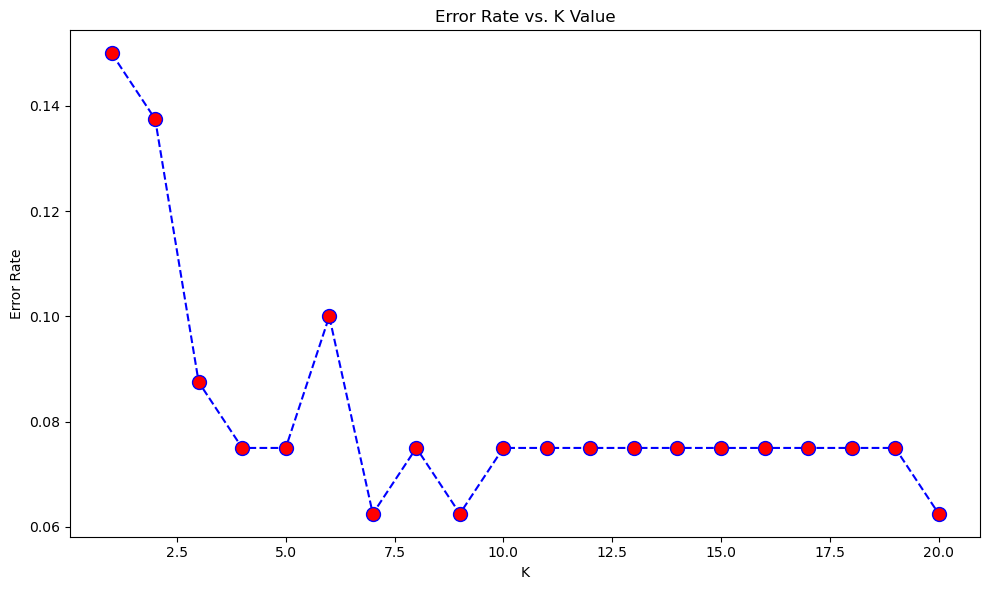

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# First, split data so we can test on unseen data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()

In [16]:
# We already split the data in the previous step
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Create our final KNN model with the optimal K
# Let's assume K=7 was the best from our elbow plot
k_optimal = 7
final_model = KNeighborsClassifier(n_neighbors=k_optimal)

# Train the model on the training data
final_model.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


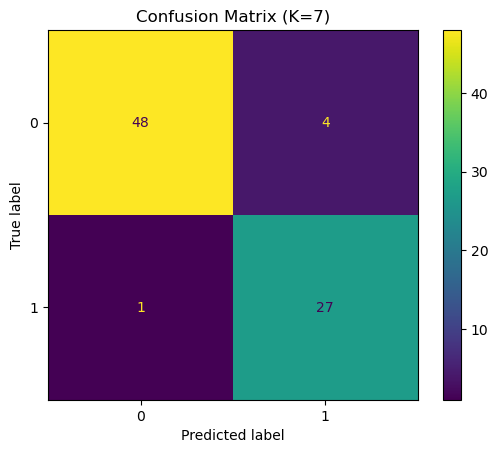

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix (K={k_optimal})')
plt.show()

In [18]:
from sklearn.metrics import classification_report

# Print a full report of the metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

